# Sentiment Analysis on IMDB Reviews using Bidirectional LSTMs

In this project, we build a sentiment analysis model using a Bidirectional Long Short-Term Memory (BiLSTM) network on the IMDB movie reviews dataset. The dataset contains 50,000 reviews, each labeled as positive (1) or negative (0). Our goal is to train a deep learning model that can correctly classify reviews as either positive or negative based on the text.

We use TensorFlow and Keras to build the model, applying word embeddings, LSTMs, and dropout regularization to enhance performance.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [ ]:
vocab_size = 10000  # Consider the top 10,000 most common words
max_length = 200  # Maximum length of each review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [ ]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Word Embeddings
    Bidirectional(LSTM(64, return_sequences=False)),  # BiLSTM layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Embedding Layer (Embedding(vocab_size, 128, input_length=max_length))

Converts integer tokenized words into dense 128-dimensional word vectors.
Helps capture relationships between words.
Bidirectional LSTM (Bidirectional(LSTM(64, return_sequences=False)))

Reads sequences in both forward and backward directions for better context understanding.
64 units in LSTM cell to capture dependencies in text.
return_sequences=False since we only need the final output of the sequence.
Dropout Layers (Dropout(0.3))

Randomly disables 30% of neurons during training to prevent overfitting.
Fully Connected Layer (Dense(64, activation='relu'))

Maps LSTM features to a higher-level representation.
Uses the ReLU activation function for non-linearity.
Output Layer (Dense(1, activation='sigmoid'))

Uses sigmoid activation, outputting a probability between 0 and 1.
Values close to 0 → Negative sentiment, close to 1 → Positive sentiment.

Before training, we configure the model with an optimizer, loss function, and evaluation metric:

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

- Adam Optimizer – Efficiently adjusts learning rates dynamically.
- Binary Crossentropy Loss – Since this is a binary classification task.
- Accuracy Metric – Tracks the percentage of correctly classified reviews.

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 253ms/step - accuracy: 0.6335 - loss: 0.6141 - val_accuracy: 0.8458 - val_loss: 0.3655
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 251ms/step - accuracy: 0.8692 - loss: 0.3344 - val_accuracy: 0.7686 - val_loss: 0.4753
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9120 - loss: 0.2334 - val_accuracy: 0.8644 - val_loss: 0.3630
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 253ms/step - accuracy: 0.9490 - loss: 0.1473 - val_accuracy: 0.8478 - val_loss: 0.4586
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 249ms/step - accuracy: 0.9693 - loss: 0.0914 - val_accuracy: 0.8532 - val_loss: 0.5582
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 247ms/step - accuracy: 0.9782 - loss: 0.0634 - val_accuracy: 0.8464 - val_loss: 0.6054
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9890 - loss: 0.0393 - val_accuracy: 0.8452 - val_loss: 0.6358
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 247ms/step - accuracy: 0.9916 -

The model adjusts weights using backpropagation and gradient descent after each batch.

The training accuracy and loss are monitored, along with the validation set performance.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 81.54%


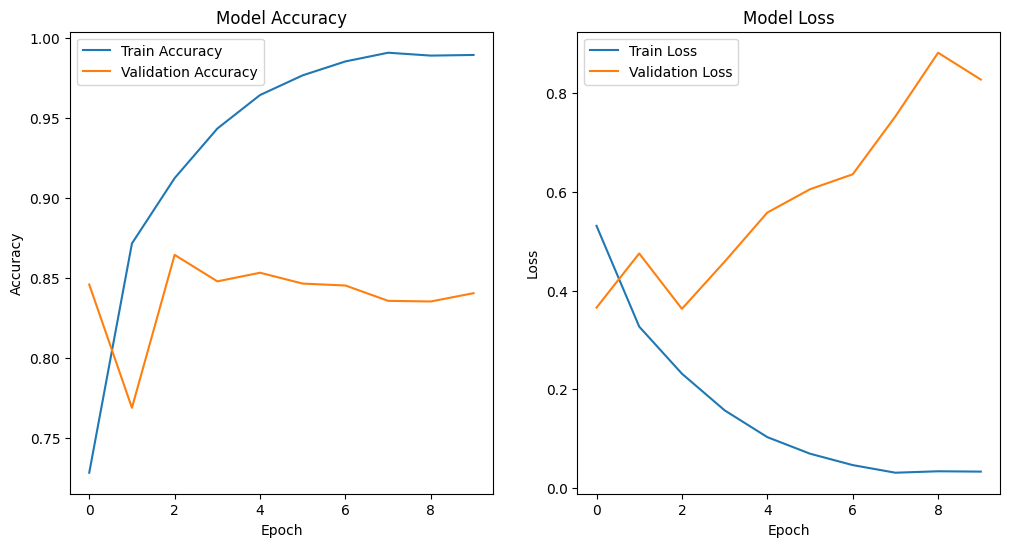

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()